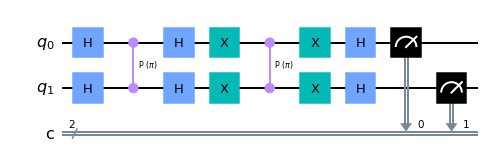

In [1]:
# 1.3.5. Grover search
import numpy as np
from math import pi, sqrt
from qiskit import *
%matplotlib inline
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram

# define grover diffusion operator
def diffusion(circuit): 
    for i in range(n):
        circuit.h(i)
        circuit.x(i)
    circuit.mcp(pi,[k for k in range(n-1)],n-1)
    for i in range(n):
        circuit.x(i)
        circuit.h(i)

# define oracle for all-one state
def ua(circuit):
    circuit.mcp(pi,[k for k in range(n-1)],n-1)

# 2 qubit example
n=2
T=int(pi/4*sqrt(2**n))

# initialization 
circuit = QuantumCircuit(n,n)

for i in range(n):
    circuit.h(i)

# grover iteration
for t in range(T):
    ua(circuit)
    diffusion(circuit)
    
# measurement
circuit.measure(range(n),range(n))
circuit.draw('mpl')


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


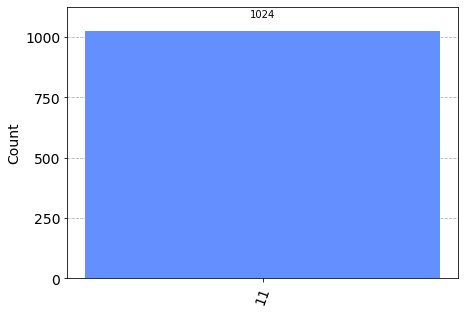

In [2]:
# histogram
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circuit, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circuit)
plot_histogram(counts)